***Netflix Movie Data Analysis***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/NishaEzhil/Downloads/Netflix.zip")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,1-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,8-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...
7786,s999,Movie,Blue Jay,Alex Lehmann,"Sarah Paulson, Mark Duplass, Clu Gulager",United States,6-Dec-16,2016,TV-MA,81,"Dramas, Independent Movies, Romantic Movies",Two former high school sweethearts unexpectedl...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [7]:
df.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

Count Movie By Genere and Release Year

In [ ]:
from collections import Counter

movies_data = df[df['type'] == 'Movie']
movies_data = df[df['type'] == 'Movie']

genre_series = movies_data['genres'].dropna().str.split(', ')
all_genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = Counter(all_genres)

In [17]:
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

In [35]:
df.value_counts('type')


type
Movie      5377
TV Show    2410
Name: count, dtype: int64

In [40]:
movies_df = df[df['type'] == 'Movie'].copy()

movies_df.dropna(subset=['genres', 'release_year'], inplace=True)

movies_df['genres'] = movies_df['genres'].str.split(', ')
movies_exploded = movies_df.explode('genres')

genre_year_counts = movies_exploded.groupby(['genres', 'release_year']).size().reset_index(name='count')

genre_year_counts.rename(columns={'genres': 'genre'}, inplace=True)

print(genre_year_counts.head(10))


                genre  release_year  count
0  Action & Adventure          1956      1
1  Action & Adventure          1960      2
2  Action & Adventure          1962      1
3  Action & Adventure          1963      1
4  Action & Adventure          1967      1
5  Action & Adventure          1968      1
6  Action & Adventure          1971      1
7  Action & Adventure          1972      1
8  Action & Adventure          1973      4
9  Action & Adventure          1975      3


Count Movies by Genere

C:\Users\NishaEzhil\AppData\Local\Temp\ipykernel_3440\2017759766.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts.head(15), x='Count', y='Genre', palette='viridis')


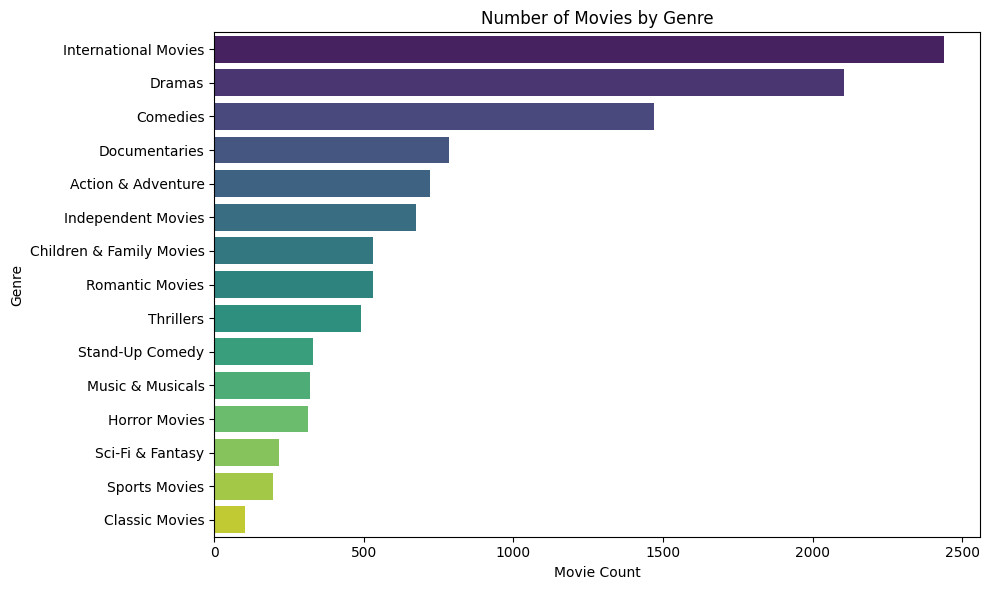

In [ ]:
movies_df = df[df['type'] == 'Movie'].copy()

movies_df.dropna(subset=['genres'], inplace=True)

movies_df['genres'] = movies_df['genres'].str.split(', ')
movies_exploded = movies_df.explode('genres')

genre_counts = movies_exploded['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts.head(15), x='Count', y='Genre', palette='viridis')
plt.title('Number of Movies by Genre')
plt.xlabel('Movie Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


Count movies by Released Year

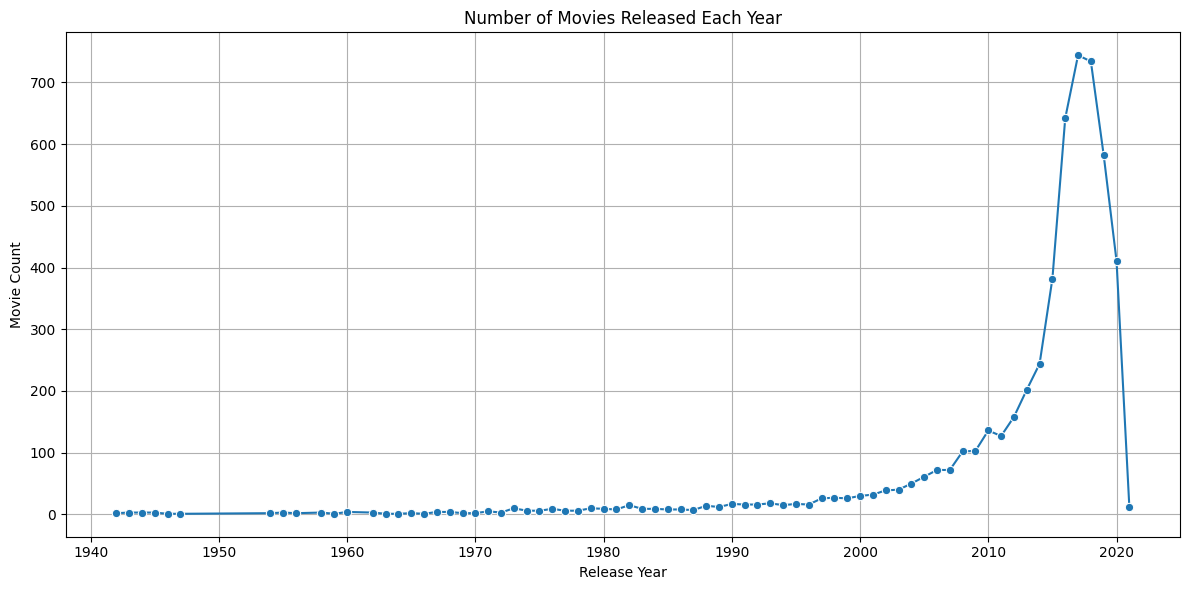

In [ ]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df.dropna(subset=['release_year'], inplace=True)

year_counts = movies_df['release_year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Release Year', 'Movie Count']

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_counts, x='Release Year', y='Movie Count', marker='o')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Movie Count')
plt.grid(True)
plt.tight_layout()
plt.show()
